# Capstone Problem Statement 

## Introduction 
Mahindra First Choice Services (MFCS) is a company of Mahindra Group and is India’s leading               chain of multi-brand car workshops with over 335+ workshops present in 267+ towns & 24               states. It has serviced over 10,50,000 cars. The company aims to establish countrywide network              of over 400 workshops by March 2018. 
 
Mahindra would now like to leverage the data that they have and address the key issues they                 have. Read along to know how you can help them improve their business.  
 
The dataset consist of three aspects: 
1. Customer data: where the details of the customer like the car owned, state and place               of residence, order type, etc are present. Data dimension is of ​534000 Customer entries 
2. Invoice data: ​where information related to customer visits and transactions are           recorded, whether a customer as insurance claims,​bifurcation of the amount paid, for             what type of service did the customer came for, etc…  
3. Material Inventory: where information related to what kind of service did the            customer took and what kind of material was used to service, Labor information             and the cost for the service, Plant and plant name where the customer took the               service.  

## Problem Statement-1
Identifying the ownership pattern of cars throughout the country. This also captures the problem wherein information regarding the spending patterns can be identified 
### Expected Business Outcome: 
Mahindra First Choice Services will be benefited in multiple ways. Knowing the ownership pattern targeted marketing campaigns could be carried out. Knowing the spending patterns services could be suited to the particular spending pattern.

## Approach 
 
You should perform the following activities 
    1. Cleaning the data 
    2. Processing and preparing the data for further analysis 
    3. Analyzing data through various visual tools 
    4. Building Predictive Models 
### Data Cleaning 
In this process, you can 

● Come up with effective measures to handle large volume data.  

● Impute the missing values. 

● Encode the categorical variables. 
### Data Processing  
● Preparing the data by tagging geolocation with positions.

● Deriving Relevant features from multiple tables.  

● Aggregating information for each state for countrywide analysis eg. number of Maruti Cars in each state etc. 
 

In [92]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


from datetime import datetime, timedelta,date

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import FeatureHasher
from statsmodels.tools.eval_measures import rmse

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading the file

In [93]:
#df_cust_data = pd.read_csv('Customer_Data.csv')
#df_plant = pd.read_excel('Plant_Master.xlsx')
final_inv_data = pd.read_csv('Final_invoice.csv')

C:\Users\Priyanka\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [94]:
final_inv_data.shape

(492314, 59)

In [95]:
final_inv_data.columns

Index(['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co',
       'Area / Locality', 'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
       'CITY', 'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
       'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
       'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value', 'User ID'],
     

In [96]:
final_inv_data_final = final_inv_data[['Cust Type','Customer No.','District','JobCard Date','KMs Reading','Make','Model','Order Type','Plant','Total Amt Wtd Tax.']].copy()
final_inv_data_final.head()

,Cust Type,Customer No.,District,JobCard Date,KMs Reading,Make,Model,Order Type,Plant,Total Amt Wtd Tax.
0,Retail,67849,Maharashtra,13/12/2014,49317,GENERAL MOTORS,SPARK,Paid Service,BC01,4051.95
1,Retail,84419,Maharashtra,02/01/2015,78584,TATA MOTORS,INDICA,SMC Value Package,BC01,1001.29
2,Retail,81055,Maharashtra,02/01/2015,33985,MARUTI SUZUKI,ZEN,Running Repairs,BC01,233.14
3,Retail,84419,Maharashtra,03/01/2015,78584,TATA MOTORS,INDICA,SMC Redemption,BC01,0.00
4,Retail,18980,Maharashtra,02/01/2015,50057,HYUNDAI,SANTRO XING,Paid Service,BC01,2747.12


In [97]:
final_inv_data_final.shape

(492314, 10)

In [98]:
# Define Utiliy Functions
def data_insights_report(data=pd.DataFrame()):
    report = pd.DataFrame()
    report['Columns'] = data.columns
    report['Data_Types'] = data.dtypes.values
    report['Unique_Count'] = data.nunique().values
    report['NAN_Count'] = data.isna().sum().values

    tempdf = data.describe().apply(lambda x: round(x,2), axis=1).T
    pd.merge(report,tempdf.reset_index().rename(columns={'index':'Columns'}), on='Columns')

    return report.join(tempdf, on='Columns')

In [99]:
data_insights_report(final_inv_data_final) # This report gives as view of the data, its metrics and basic actionable Insights

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,Cust Type,object,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Customer No.,object,253484,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,District,object,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JobCard Date,object,1643,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KMs Reading,int64,159473,0,492314.0,77577.03,116888.17,0.0,34096.25,60078.50,93769.00,9999999.00
5,Make,object,28,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Model,object,245,1525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Order Type,object,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Plant,object,242,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total Amt Wtd Tax.,float64,258071,0,492314.0,4394.98,11080.90,-137.0,299.04,1452.82,4409.92,648203.49


In [100]:
final_inv_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492314 entries, 0 to 492313
Data columns (total 10 columns):
Cust Type             492314 non-null object
Customer No.          492314 non-null object
District              492314 non-null object
JobCard Date          492314 non-null object
KMs Reading           492314 non-null int64
Make                  492314 non-null object
Model                 490789 non-null object
Order Type            492314 non-null object
Plant                 492314 non-null object
Total Amt Wtd Tax.    492314 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 37.6+ MB


### Defining Required Functions

In [101]:
'''
Creating attributes of Recency, Frequency and Monetary value along with Mileage
'''
def RFM_feature(data): 
    rec = pd.DataFrame(data.groupby(['Customer No.','District','Model'])
                       ['JobCard Date'].max()).reset_index()
    rec['Recency'] = (rec['JobCard Date'].max() - rec['JobCard Date']).dt.days
    rec.drop('JobCard Date',axis=1,inplace=True)

    freq = pd.DataFrame(data.groupby(['Customer No.','District','Model'])
                        ['JobCard Date'].count()).reset_index()
    freq.columns = ['Customer No.','District','Model','Frequency']

    rev = pd.DataFrame(data.groupby(['Customer No.','District','Model'])
                       ['Total Amt Wtd Tax.'].sum()).reset_index()
    rev.columns = ['Customer No.','District','Model','Revenue']

    km = pd.DataFrame(data.groupby(['Customer No.','District','Model'])
                      ['KMs Reading'].max()).reset_index()
    km.columns = ['Customer No.','District','Model','Mileage']
    
    temp_df = pd.merge(rec,freq,on=['Customer No.','District','Model'])
    temp_df = pd.merge(temp_df,km,on=['Customer No.','District','Model'])
    temp_df = pd.merge(temp_df,rev,on=['Customer No.','District','Model'])
    temp_df.head()
    return temp_df

In [102]:
'''
To identify outliers in the dataset
'''

def get_outliers(self):
        a_list = []
        per_75 = np.percentile(self,75)
        per_25 = np.percentile(self,25)
        iqr = per_75-per_25
        tot_75 = per_75 + (1.5*iqr)
        tot_25 = per_25 - (1.5*iqr)
        a_list1 = np.array(self).tolist()
        for j in a_list1:
            if j > tot_75:
                a_list.append(j)
            if j < tot_25:
                a_list.append(j)
        return a_list

In [103]:
'''
Visualization of outliers for boxplot and distribution plot and understanding the description
'''

def box_plot(data,variable):
    boxplot = data.boxplot(column=[variable])
    plt.show()
    
def dist_plot(data,variable):
    sns.distplot(data[variable])
    plt.axvline(data[variable].mean(), color='r', linestyle='--')
    plt.axvline(data[variable].median(), color='g', linestyle='-')
    plt.show()
    print ('Mean for ',variable,' =',data[variable].mean())
    print ('Median for ',variable,' =',data[variable].median())

In [104]:
'''
Treating for extreme outliers
'''
def outliers_treat(temp_df):
    temp_df=temp_df[temp_df['Customer No.']!='E4981']
    temp_df=temp_df[temp_df['Mileage']<150000]
    temp_df=temp_df[temp_df['Revenue']<1000000]
    return temp_df

In [105]:
'''
Feature engineering with Mileage Feture
'''
def mileage_avg(temp_df):
    temp_df['Mileage']=150000 - temp_df['Mileage']
    return temp_df

In [106]:
'''
Predicting cluster for each of the RFM Feature
'''
def predict_cluster(test_df,target_field):
    km = KMeans(n_clusters=K)
    km.fit(test_df[[target_field]])
    test_df[target_field+'Cluster'] = km.predict(test_df[[target_field]])
    display (test_df.head())
    return test_df

In [107]:
'''
K-means assigns clusters as numbers but not in an ordered way. We can’t say cluster 0 is the worst and cluster 4 
is the best. order_cluster() method does this for us
'''
def order_cluster(cluster_field_name,target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby([cluster_field_name])[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [108]:
'''
Function for getting statistical description for cluster
'''
def stat_desc(df,cluster_field,target_field):
    tx_user = pd.DataFrame(df.groupby([cluster_field])[target_field].count()).reset_index()
    tx_user.columns = [cluster_field,'count']
    tx_user['mean'] = pd.DataFrame(df.groupby([cluster_field])[target_field].mean())
    tx_user['std'] = pd.DataFrame(df.groupby([cluster_field])[target_field].std())
    tx_user['min'] = pd.DataFrame(df.groupby([cluster_field])[target_field].min())
    tx_user['25%'] = pd.DataFrame(df.groupby([cluster_field])[target_field].quantile(q=0.25))
    tx_user['50%'] = pd.DataFrame(df.groupby([cluster_field])[target_field].quantile(q=0.5))
    tx_user['75%'] = pd.DataFrame(df.groupby([cluster_field])[target_field].quantile(q=0.75))
    tx_user['max'] = pd.DataFrame(df.groupby([cluster_field])[target_field].max())
    display (tx_user)

In [109]:
'''
To treat right/positive skewness of the data, applying log transformation method for Frequency and Revenue columns
'''
def log_transform(model_df):    
    model_df['Frequency'] = np.log(model_df['Frequency'])
    model_df['Revenue'] = np.log(model_df['Revenue'] + 1)
    return model_df

In [110]:
'''
Applying OHE to categorical fields
'''
def OHE(model_df):
    model_df = pd.get_dummies(model_df,columns=['District','Model'],drop_first=False)
    return model_df

In [111]:
'''
Applying Feature Hashing Scheme to categorical fields
'''
def hash_feature(model_df):
    fh1 = FeatureHasher(n_features=10, input_type='string')
    fh2 = FeatureHasher(n_features=10, input_type='string')
    hashed_features1 = fh1.fit_transform(model_df['District'])
    hashed_features2 = fh2.fit_transform(model_df['Model'])
    hashed_features1 = pd.DataFrame(hashed_features1.toarray())
    hashed_features2 = pd.DataFrame(hashed_features2.toarray())
    model_df = pd.merge(model_df,hashed_features1,left_index=True,right_index=True)
    model_df = pd.merge(model_df,hashed_features2,left_index=True,right_index=True)
    model_df.drop(['District','Model'],axis=1,inplace=True)
    return model_df

In [112]:
'''
Splitting data into X and Y
'''
def split_data(model_df):
    X = model_df.drop(['Customer No.','Revenue'],axis=1)
    y = model_df['Revenue']
    return (X,y)

In [113]:
'''
Fitting Random Forest Regressor Model
'''
def fit_data(X_train,y_train,model):
    model.fit(X_train,y_train)
    print ('Accuracy of the Model is = ',model.score(X_train,y_train))

In [114]:
'''
Predicting target variable using fitted model
'''
def predict_data(X_test,y_test,model):
    pred = model.predict(X_test)
    print ('Root Mean Square Error for the model is within plus/minus of ',rmse(pred,y_test))

## Loading dataset with required fields

In [115]:
'''
Loading the dataset with required fields from Invoice file dataset
'''
invoice_data = final_inv_data[['Customer No.','District','Model','JobCard Date',
                               'KMs Reading','Order Type','Total Amt Wtd Tax.']].copy()
invoice_data['Customer No.'] = invoice_data['Customer No.'].astype(str)
invoice_data['District'] = invoice_data['District'].astype(str)
invoice_data['Model'] = invoice_data['Model'].astype(str)
invoice_data['JobCard Date'] = pd.to_datetime(invoice_data['JobCard Date'])
invoice_data.head()

,Customer No.,District,Model,JobCard Date,KMs Reading,Order Type,Total Amt Wtd Tax.
0,67849,Maharashtra,SPARK,2014-12-13,49317,Paid Service,4051.95
1,84419,Maharashtra,INDICA,2015-02-01,78584,SMC Value Package,1001.29
2,81055,Maharashtra,ZEN,2015-02-01,33985,Running Repairs,233.14
3,84419,Maharashtra,INDICA,2015-03-01,78584,SMC Redemption,0.00
4,18980,Maharashtra,SANTRO XING,2015-02-01,50057,Paid Service,2747.12


In [116]:
    '''
Removing data related to Accidents as that counts to adhoc type of expences which are really difficult to predict
since lot of it's aspect depend on driver's atrribute, road attributes for which we do not have data to accomodate
such features.
'''
final_invoice_data = invoice_data[invoice_data['Order Type']!='Accidental']

In [117]:
'''
Dividing dataset based on period of first 4 years (2012-2015) as training and last 1 year (2016) as test (unseen) data
'''
data_4yr = final_invoice_data[(final_invoice_data['JobCard Date'] > date(2012,1,1)) & 
                              (final_invoice_data['JobCard Date'] <= date(2015,12,31))].reset_index(drop=True)
data_1yr = final_invoice_data[(final_invoice_data['JobCard Date'] > date(2016,1,1)) & 
                              (final_invoice_data['JobCard Date'] <= date(2016,12,31))].reset_index(drop=True)

C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce

## Train the model for data between 2012 to 2015

In [118]:
'''
Creating attributes of Recency, Frequency and Monetary value
'''
temp_df = RFM_feature(data_4yr)

In [119]:
'''
Finding outliers
'''
for i in temp_df[['Recency','Frequency','Mileage','Revenue']]:
    outliers = get_outliers(temp_df[i])
    print ("Total outliers in Column",temp_df[i].name," =",len(outliers))
    print ("Percentatge of outliers in Column",temp_df[i].name," =",
           round(((len(outliers)/temp_df.shape[0])*100),2))
    print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

Total outliers in Column Recency  = 102
Percentatge of outliers in Column Recency  = 0.07
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column Frequency  = 16396
Percentatge of outliers in Column Frequency  = 11.93
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column Mileage  = 6548
Percentatge of outliers in Column Mileage  = 4.77
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column Revenue  = 13425
Percentatge of outliers in Column Revenue  = 9.77
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **


In [120]:
'''
Treating for extreme outliers
'''
temp_df = outliers_treat(temp_df)

Boxplot visualization for Recency


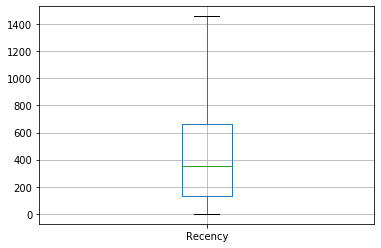

Distribution plot visualization for Recency


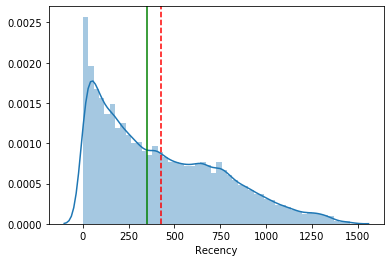

Mean for  Recency  = 424.0224429293763
Median for  Recency  = 352.0
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Boxplot visualization for Frequency


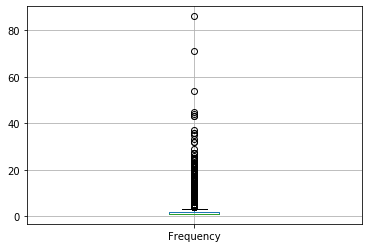

Distribution plot visualization for Frequency


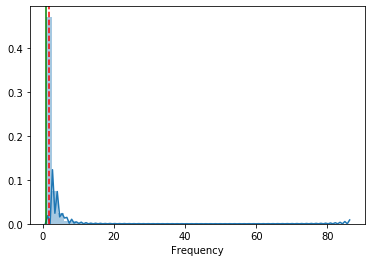

Mean for  Frequency  = 1.8906791856377834
Median for  Frequency  = 1.0
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Boxplot visualization for Mileage


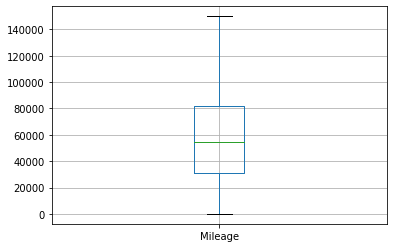

Distribution plot visualization for Mileage


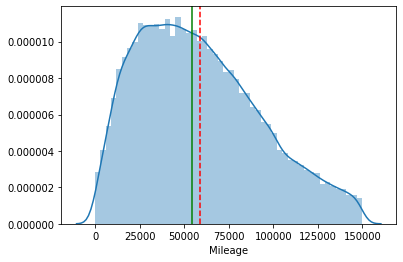

Mean for  Mileage  = 58793.79330329409
Median for  Mileage  = 54467.0
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Boxplot visualization for Revenue


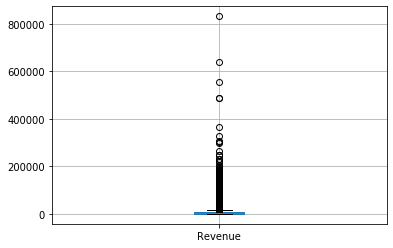

Distribution plot visualization for Revenue


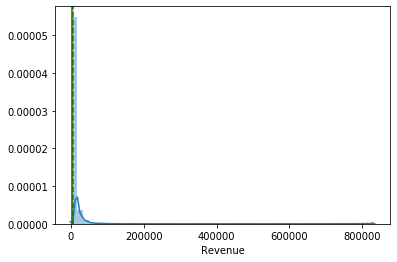

Mean for  Revenue  = 5859.620125347087
Median for  Revenue  = 2364.55
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **


In [121]:
'''
Visualization of outliers with boxplot and distribution plot and understanding the description
'''

# For Recency
print ('Boxplot visualization for Recency')
box_plot(temp_df,'Recency')
print ('Distribution plot visualization for Recency')
dist_plot(temp_df,'Recency')
print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

# For Frequency
print ('Boxplot visualization for Frequency')
box_plot(temp_df,'Frequency')
print ('Distribution plot visualization for Frequency')
dist_plot(temp_df,'Frequency')
print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

# For Mileage
print ('Boxplot visualization for Mileage')
box_plot(temp_df,'Mileage')
print ('Distribution plot visualization for Mileage')
dist_plot(temp_df,'Mileage')
print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

# For Revenue
print ('Boxplot visualization for Revenue')
box_plot(temp_df,'Revenue')
print ('Distribution plot visualization for Revenue')
dist_plot(temp_df,'Revenue')
print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

In [122]:
'''
Feature engineering with Mileage Feture
'''
temp_df = mileage_avg(temp_df)

In [123]:
'''
Applying K Means Cluster to find out number of clusters 
So for convenience let’s start by choosing number of iterations as 100.
'''
m=temp_df.shape[0] #number of training examples.
print ("m =",m)
n=temp_df.shape[1] #number of features.
print ("n =",n)
n_iter=100

m = 127167
n = 7


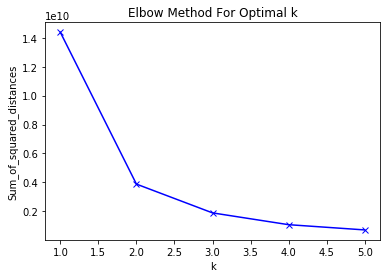

In [124]:
'''
Elbow method to decide on optimal number of clusters
'''

Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k, max_iter=n_iter)
    km = km.fit(pd.DataFrame(temp_df['Recency']))
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [125]:
'''
Deciding on optimum value of K
'''
K = 4

In [126]:
'''
Creating Recency Cluster
'''
temp_df = predict_cluster(temp_df,'Recency')
temp_df = order_cluster('RecencyCluster','Recency',temp_df,False)
stat_desc(temp_df,'RecencyCluster','Recency')

,Customer No.,District,Model,Recency,Frequency,Mileage,Revenue,RecencyCluster
0,1,Maharashtra,KIZASHI,1457,1,148788,0.00,2
1,1,Maharashtra,OMNI,1019,3,110025,0.00,2
2,10,Maharashtra,OPTRA,927,5,27176,11105.56,2
3,100,Maharashtra,CITY,1178,1,111424,6632.67,2
4,1000,Maharashtra,ALTO,443,6,130904,8813.44,3


,RecencyCluster,count,mean,std,min,25%,50%,75%,max
0,0,14223,1070.550095,140.939739,887,952.0,1039.0,1168.00,1457
1,1,29438,700.438990,96.490107,541,618.0,696.0,778.75,886
2,2,34074,380.386013,85.965116,242,304.0,378.5,453.75,540
3,3,49432,103.463991,70.890744,0,40.0,96.0,165.00,241


In [127]:
'''
Creating Frequency Cluster
'''
temp_df = predict_cluster(temp_df,'Frequency')
temp_df = order_cluster('FrequencyCluster','Frequency',temp_df,True)
stat_desc(temp_df,'FrequencyCluster','Frequency')

,Customer No.,District,Model,Recency,Frequency,Mileage,Revenue,RecencyCluster,FrequencyCluster
0,1,Maharashtra,KIZASHI,1457,1,148788,0.00,0,0
1,1,Maharashtra,OMNI,1019,3,110025,0.00,0,3
2,10,Maharashtra,OPTRA,927,5,27176,11105.56,0,1
3,100,Maharashtra,CITY,1178,1,111424,6632.67,0,0
4,10037,Maharashtra,POLO,1039,1,98316,267.00,0,0


,FrequencyCluster,count,mean,std,min,25%,50%,75%,max
0,0,79915,1.000000,0.000000,1,1.0,1.0,1.0,1
1,1,32554,2.321742,0.467152,2,2.0,2.0,3.0,3
2,2,12368,4.887613,0.998656,4,4.0,5.0,6.0,7
3,3,2330,10.508584,4.181495,8,8.0,9.0,11.0,86


In [128]:
'''
Creating Revenue Cluster
'''
temp_df = predict_cluster(temp_df,'Revenue')
temp_df = order_cluster('RevenueCluster','Revenue',temp_df,True)
stat_desc(temp_df,'RevenueCluster','Revenue')

,Customer No.,District,Model,Recency,Frequency,Mileage,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster
0,1,Maharashtra,KIZASHI,1457,1,148788,0.00,0,0,0
1,100,Maharashtra,CITY,1178,1,111424,6632.67,0,0,0
2,10037,Maharashtra,POLO,1039,1,98316,267.00,0,0,0
3,1005,Maharashtra,INDICA,1151,1,83219,9773.65,0,0,0
4,1006,Maharashtra,IKON,1151,1,108086,4555.04,0,0,0


,RevenueCluster,count,mean,std,min,25%,50%,75%,max
0,0,108841,2706.566228,2807.836285,0.00,445.000,1695.04,4166.9900,11215.98
1,1,16501,19756.643736,7520.276542,11217.09,13761.350,17424.21,23807.5500,42477.77
2,2,1807,65326.625362,25714.121645,42508.04,47676.115,56092.54,74238.3900,206609.16
3,3,18,361963.741111,171910.532101,217503.35,247846.305,299656.63,456634.0675,832669.42


In [129]:
'''
Creating Mileage Cluster
'''
temp_df = predict_cluster(temp_df,'Mileage')
temp_df = order_cluster('MileageCluster','Mileage',temp_df,True)
stat_desc(temp_df,'MileageCluster','Mileage')


,Customer No.,District,Model,Recency,Frequency,Mileage,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,MileageCluster
0,1,Maharashtra,KIZASHI,1457,1,148788,0.00,0,0,0,0
1,100,Maharashtra,CITY,1178,1,111424,6632.67,0,0,0,3
2,10037,Maharashtra,POLO,1039,1,98316,267.00,0,0,0,3
3,1005,Maharashtra,INDICA,1151,1,83219,9773.65,0,0,0,3
4,1006,Maharashtra,IKON,1151,1,108086,4555.04,0,0,0,3


,MileageCluster,count,mean,std,min,25%,50%,75%,max
0,0,15621,27989.738301,13213.401346,1,17680.00,29884.0,39402.0,47495
1,1,31467,67017.566149,9924.323112,47499,58903.00,67959.0,75611.0,82562
2,2,40730,98263.092929,8755.095680,82564,90725.25,98451.5,105802.0,113201
3,3,39349,128341.113014,9534.344022,113205,120248.00,127419.0,135673.0,150000


In [130]:
'''
Calculating Overall score
'''
temp_df['OverallScore'] = temp_df['RecencyCluster'] + temp_df['FrequencyCluster'] + temp_df['RevenueCluster'] + temp_df['MileageCluster']
display (temp_df.head())
display(temp_df.groupby('OverallScore')['Recency','Frequency','Revenue','Mileage'].mean())

,Customer No.,District,Model,Recency,Frequency,Mileage,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,MileageCluster,OverallScore
0,1,Maharashtra,KIZASHI,1457,1,148788,0.00,0,0,0,3,3
1,1009,Tamil Nadu,ALTO,1121,1,137230,598.96,0,0,0,3,3
2,1012,Tamil Nadu,SANTRO,1151,1,148501,991.48,0,0,0,3,3
3,1013,Tamil Nadu,SWIFT DZIRE,1151,1,132978,2399.52,0,0,0,3,3
4,10137,Karnataka,VISTA,1051,1,119804,3843.81,0,0,0,3,3


,Recency,Frequency,Revenue,Mileage
OverallScore,,,,
0,1074.134033,1.000000,2251.158613,29750.424242
1,921.672398,1.055346,2726.352784,49327.781677
2,778.028023,1.131898,3067.992471,66586.208787
3,619.213933,1.217695,3381.558282,79939.114400
4,447.850007,1.407680,4068.094916,90760.752145
5,300.040931,1.716911,5196.800390,99936.938133
6,190.710781,2.187035,6747.339620,109368.708137
7,166.173335,3.865879,13120.415668,104984.199250
8,129.080277,6.034652,21415.765212,101595.213688


In [131]:
temp_df.to_csv('Final_Clusters.csv')

In [132]:
'''
Selecting only required RFM features for model building
'''
model_df = temp_df.iloc[:,0:7]

In [133]:
'''
Understanding skewness of data before applying any skewness correction treatment
'''
model_df.skew(axis=0)

Recency       0.696995
Frequency     5.440516
Mileage      -0.516503
Revenue      11.826165
dtype: float64

In [134]:
'''
To treat right/positive skewness of the data, applying log transformation method for Frequency and Revenue columns
'''
model_df = log_transform(model_df)

In [135]:
'''
Skewness of data post applying correcting measures
'''
model_df.skew(axis=0)

Recency      0.696995
Frequency    1.341952
Mileage     -0.516503
Revenue     -1.572178
dtype: float64

Distribution plot visualization for Frequency


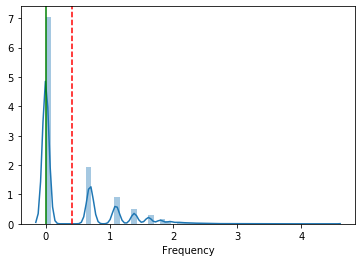

Mean for  Frequency  = 0.4055542352338513
Median for  Frequency  = 0.0
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Distribution plot visualization for Mileage


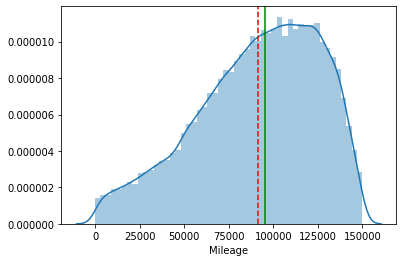

Mean for  Mileage  = 91206.2066967059
Median for  Mileage  = 95533.0
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Distribution plot visualization for Revenue


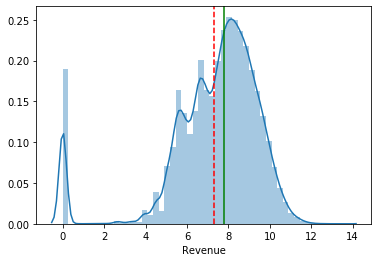

Mean for  Revenue  = 7.327911513759914
Median for  Revenue  = 7.768765832028116
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **


In [136]:
'''
Visualization of distribution plot post skewness correction
'''

# For Frequency
print ('Distribution plot visualization for Frequency')
dist_plot(model_df,'Frequency')
print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

# For Mileage
print ('Distribution plot visualization for Mileage')
dist_plot(model_df,'Mileage')
print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

# For Revenue
print ('Distribution plot visualization for Revenue')
dist_plot(model_df,'Revenue')
print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

In [137]:
'''
Applying OHE to categorical fields
'''
#model_df = OHE(model_df)

'\nApplying OHE to categorical fields\n'

In [138]:
'''
Applying Feature Hashing Scheme to categorical fields
'''
model_df = hash_feature(model_df)

In [139]:
'''
Splitting data into X and Y
'''
X,y = split_data(model_df)

In [140]:
'''
Creating Train and Test sample to fit and predict using Random Forest Regressor model
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [141]:
'''
Defining the model
'''
model = RandomForestRegressor(n_estimators=100)

In [142]:
'''
Fitting Random Forest Regressor Model
'''
fit_data(X_train,y_train,model)

Accuracy of the Model is =  0.8884279674172948


In [143]:
'''
Predicting target variable using fitted model
'''
predict_data(X_test,y_test,model)

Root Mean Square Error for the model is within plus/minus of  2.0200101438309503


In [144]:
 print ('Accuracy of the Model is = ',model.score(X_test,y_test))

Accuracy of the Model is =  0.21284690995886746


## Testing model on 2016 data

In [145]:
'''
Creating attributes of Recency, Frequency and Monetary value
'''
temp_df_test = RFM_feature(data_1yr)

In [146]:
'''
Treating for extreme outliers
'''
temp_df_test = outliers_treat(temp_df_test)

In [147]:
'''
Feature engineering with Mileage Feture
'''
temp_df_test = mileage_avg(temp_df_test)

In [148]:
'''
Selecting only required RFM features for model building
'''
model_df_test = temp_df_test.iloc[:,0:7]

In [149]:
'''
Understanding skewness of data before applying any skewness correction treatment
'''
model_df_test.skew(axis=0)

Recency       0.336416
Frequency    12.844593
Mileage      -0.443139
Revenue      18.271441
dtype: float64

In [150]:
'''
To treat right/positive skewness of the data, applying log transformation method for Frequency and Revenue columns
'''
model_df_test = log_transform(model_df_test)

In [151]:
'''
Skewness of data post applying correcting measures
'''
model_df_test.skew(axis=0)

Recency      0.336416
Frequency    1.801139
Mileage     -0.443139
Revenue     -1.326058
dtype: float64

In [152]:
'''
Applying Feature Hashing Scheme to categorical fields
'''
model_df_test = hash_feature(model_df_test)

In [153]:
'''
Splitting data into X and Y
'''
X,y = split_data(model_df_test)

In [154]:
'''
Predicting target variable using fitted model
'''
predict_data(X,y,model)

Root Mean Square Error for the model is within plus/minus of  2.6071227305443214


In [155]:
 print ('Accuracy of the Model is = ',model.score(X,y))

Accuracy of the Model is =  -0.020265356542006785
